In [132]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) 
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import wordnet
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
import pickle
from collections import Counter
from itertools import chain
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix

<ipython-input-132-dccc1e96523b>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [17]:
df = pd.read_csv("tweets_noemoticon.csv", encoding = 'latin-1', header = None)

In [18]:
df.head(20)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [19]:
df.iloc[15]

0    0                                                                                                      
1    1467812799                                                                                             
2    Mon Apr 06 22:20:20 PDT 2009                                                                           
3    NO_QUERY                                                                                               
4    HairByJess                                                                                             
5    @iamjazzyfizzle I wish I got to watch it with you!! I miss you and @iamlilnicki  how was the premiere?!
Name: 15, dtype: object

In [20]:
df[0] = df[0].apply(lambda x: 1 if x==4 else x)

In [21]:
# rename columns
df = df.rename(columns={5: 'text', 0: 'target', 2: 'timestamp', 4: 'username'})

In [22]:
import nltk

In [23]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aishabaitemirova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aishabaitemirova/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<AxesSubplot:xlabel='target', ylabel='count'>

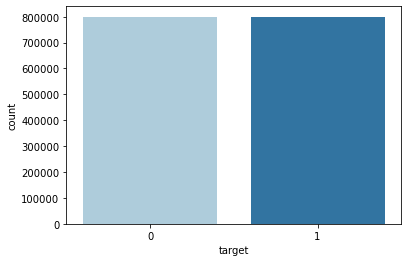

In [24]:
sns.set_palette("Paired")
sns.countplot(x= 'target',data=df)

In [25]:
# lowercase and remove punctuation
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

In [11]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [26]:
w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

In [32]:
df.columns

Index(['target', 1, 'timestamp', 3, 'username', 'text'], dtype='object')

In [46]:
def lemmatize_text(text):

    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in w_tokenizer.tokenize(text)]

In [47]:
# lemmatize text
df['text_lemmatized'] = df.text.apply(lemmatize_text)

In [48]:
df.to_pickle('file.pkl')

In [4]:
df1 = pd.read_pickle('file.pkl')

In [5]:
df1

,target,1,timestamp,3,username,text,text_lemmatized
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]"
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]"
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]"
...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feeling ever,"[just, woke, up, have, no, school, be, the, best, feel, ever]"
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool to hear old walt interviews â httpblipfm8bmta,"[thewdbcom, very, cool, to, hear, old, walt, interview, â, httpblipfm8bmta]"
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me for details,"[be, you, ready, for, your, mojo, makeover, ask, me, for, detail]"
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time tupac amaru shakur,"[happy, 38th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur]"


In [6]:
df1.dtypes

target             int64 
1                  int64 
timestamp          object
3                  object
username           object
text               object
text_lemmatized    object
dtype: object

In [7]:
df1.head(2)

,target,1,timestamp,3,username,text,text_lemmatized
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]"


In [8]:
# drop irrelevant columns
df1.drop(columns= 1, axis=1, inplace=True)
df1.drop(columns= 3, axis=1, inplace=True)

In [9]:
df1.head(5)

,target,timestamp,username,text,text_lemmatized
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]"
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]"
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]"
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]"
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]"


In [10]:
# remove hashtags and mentions
df1['text'] = df1['text'].apply(lambda t: re.sub('@[^ ]+|#[^ ]+', '', t))

In [11]:
# import stopwords from nltk
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# append some additional stopwords to the nltk stopwords list
stopwords.append('shoulda')
stopwords.append('im')

In [13]:
# remove stopwords
df1['text_nostopwords'] = df1['text_lemmatized'].apply(lambda x: ' '.join([word for word in x if word not in (stopwords)]))

In [14]:
df1

,target,timestamp,username,text,text_lemmatized,text_nostopwords
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]",switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]",upset cant update facebook texting might cry result school today also blah
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]",kenichan dive many time ball manage save 50 rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]",whole body feel itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]",nationwideclass behaving mad cant see
...,...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,just woke up having no school is the best feeling ever,"[just, woke, up, have, no, school, be, the, best, feel, ever]",woke school best feel ever
1599996,1,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,thewdbcom very cool to hear old walt interviews â httpblipfm8bmta,"[thewdbcom, very, cool, to, hear, old, walt, interview, â, httpblipfm8bmta]",thewdbcom cool hear old walt interview â httpblipfm8bmta
1599997,1,Tue Jun 16 08:40:49 PDT 2009,bpbabe,are you ready for your mojo makeover ask me for details,"[be, you, ready, for, your, mojo, makeover, ask, me, for, detail]",ready mojo makeover ask detail
1599998,1,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,happy 38th birthday to my boo of alll time tupac amaru shakur,"[happy, 38th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur]",happy 38th birthday boo alll time tupac amaru shakur


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   target            1600000 non-null  int64 
 1   timestamp         1600000 non-null  object
 2   username          1600000 non-null  object
 3   text              1600000 non-null  object
 4   text_lemmatized   1600000 non-null  object
 5   text_nostopwords  1600000 non-null  object
dtypes: int64(1), object(5)
memory usage: 73.2+ MB


In [16]:
stemmer = SnowballStemmer('english')

In [17]:
df1['text_stemmed'] =df1['text_nostopwords'].apply(lambda x: stemmer.stem(x))

In [18]:
df1.head()

,target,timestamp,username,text,text_lemmatized,text_nostopwords,text_stemmed
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]",switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day,switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]",upset cant update facebook texting might cry result school today also blah,upset cant update facebook texting might cry result school today also blah
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]",kenichan dive many time ball manage save 50 rest go bound,kenichan dive many time ball manage save 50 rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]",whole body feel itchy like fire,whole body feel itchy like fir
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]",nationwideclass behaving mad cant see,nationwideclass behaving mad cant se


In [19]:
len(df1)

1600000

In [20]:
# check if there are any duplicates in the dataset
duplicates = df1.loc[df1.duplicated(subset=['text_nostopwords'])]

In [21]:
duplicates.shape

(49873, 7)

In [22]:
duplicates['text_nostopwords'].value_counts()

work                                                                                 695
good morning                                                                         536
headache                                                                             533
                                                                                     391
tire                                                                                 351
                                                                                    ... 
get sunburnt work need get sunscreen                                                 1  
iamroccett get 100 follower day use wwwtweeteraddercom add everyone train pay vip    1  
ampamp throat hurt ehh dnt want sick excite tonite much need                         1  
sick fun                                                                             1  
dannymcfly brazil love danny                                                         1  
Name: text_nostopword

In [23]:
type(duplicates)

pandas.core.frame.DataFrame

In [24]:
duplicates_updated = duplicates.groupby('text_nostopwords').filter(lambda x : len(x)>300)

In [25]:
len(duplicates_updated['text_nostopwords'])

2829

In [26]:
duplicates_updated['text_nostopwords'].value_counts().head(6)

work            695
good morning    536
headache        533
                391
tire            351
rain            323
Name: text_nostopwords, dtype: int64

In [31]:
df1.to_pickle('file1.pkl')

In [26]:
df_processed = pd.read_pickle('file1.pkl')

In [27]:
df_processed.head(5)

,target,timestamp,username,text,text_lemmatized,text_nostopwords,text_stemmed
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]",switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day,switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]",upset cant update facebook texting might cry result school today also blah,upset cant update facebook texting might cry result school today also blah
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]",kenichan dive many time ball manage save 50 rest go bound,kenichan dive many time ball manage save 50 rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]",whole body feel itchy like fire,whole body feel itchy like fir
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]",nationwideclass behaving mad cant see,nationwideclass behaving mad cant se


In [28]:
len(df_processed)

1600000

In [29]:
remove_n = 1590000

In [30]:
drop_indices = np.random.choice(df_processed.index, remove_n, replace=False)

In [31]:
drop_indices

array([ 973795, 1530661,  305696, ...,  801057, 1160553, 1231485])

In [32]:
df_subset = df_processed.drop(drop_indices)

In [33]:
v=df_subset['text_stemmed'].str.split().tolist()

In [34]:
c=Counter(chain.from_iterable(v))

In [35]:
c

Counter({'really': 301,
         'dont': 418,
         'feel': 322,
         'like': 473,
         'get': 1052,
         'today': 426,
         'study': 39,
         'tomorrow': 202,
         'practical': 2,
         'exam': 59,
         'go': 982,
         'sleep': 198,
         'tonit': 4,
         'miss_om': 1,
         'aww': 48,
         'know': 354,
         'felt': 11,
         'yesterday': 54,
         'work': 580,
         'scoutbuck': 1,
         'ton': 8,
         'hay': 5,
         'troll': 1,
         'ahhhh': 8,
         'good': 574,
         'night': 252,
         'swetdreamss': 1,
         'everyonee': 1,
         'jared': 1,
         'never': 114,
         'chat': 13,
         'kyte': 1,
         'puff': 5,
         'alyssaspears': 1,
         'sorry': 142,
         'maybe': 79,
         'walk': 42,
         'around': 64,
         'goofy': 1,
         'store': 25,
         'would': 153,
         'helphint': 1,
         'hint': 5,
         'lt3': 66,
         'decide': 

In [36]:
df_subset['low_removed']=[' '.join([j for j in i if c[j] > 10]) for i in v]

In [37]:
df_processed.head(1)

,target,timestamp,username,text,text_lemmatized,text_nostopwords,text_stemmed
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]",switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day,switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day


In [38]:
df_subset.head(10)

,target,timestamp,username,text,text_lemmatized,text_nostopwords,text_stemmed,low_removed
40,0,Mon Apr 06 22:21:39 PDT 2009,itsanimesh,really dont feel like getting up today but got to study to for tomorrows practical exam,"[really, dont, feel, like, get, up, today, but, get, to, study, to, for, tomorrow, practical, exam]",really dont feel like get today get study tomorrow practical exam,really dont feel like get today get study tomorrow practical exam,really dont feel like get today get study tomorrow exam
197,0,Mon Apr 06 22:32:51 PDT 2009,supersharayah,is not going to sleep tonite,"[be, not, go, to, sleep, tonite]",go sleep tonite,go sleep tonit,go sleep
244,0,Mon Apr 06 22:36:15 PDT 2009,nicole___,miss_om aww i know i felt like that yesterday at work,"[miss_om, aww, i, know, i, felt, like, that, yesterday, at, work]",miss_om aww know felt like yesterday work,miss_om aww know felt like yesterday work,aww know felt like yesterday work
353,0,Mon Apr 06 22:43:23 PDT 2009,edlimagno,scoutbuck tons no hay troll ahhhh,"[scoutbuck, ton, no, hay, troll, ahhhh]",scoutbuck ton hay troll ahhhh,scoutbuck ton hay troll ahhhh,
1177,0,Mon Apr 06 23:42:57 PDT 2009,cristygarza,good night swetdreamss to everyonee and jared never chat in kyte puff,"[good, night, swetdreamss, to, everyonee, and, jared, never, chat, in, kyte, puff]",good night swetdreamss everyonee jared never chat kyte puff,good night swetdreamss everyonee jared never chat kyte puff,good night never chat
1224,0,Mon Apr 06 23:46:42 PDT 2009,Goldae,alyssaspears im sorry maybe walking around all goofy at the store would helphint hint lt3,"[alyssaspears, im, sorry, maybe, walk, around, all, goofy, at, the, store, would, helphint, hint, lt3]",alyssaspears sorry maybe walk around goofy store would helphint hint lt3,alyssaspears sorry maybe walk around goofy store would helphint hint lt3,sorry maybe walk around store would lt3
1253,0,Mon Apr 06 23:47:55 PDT 2009,mindylmm,decided to rejoin aerobics cos i know i wont exercise if i dont after paying for it i only have rm3 left in my bag,"[decide, to, rejoin, aerobics, co, i, know, i, wont, exercise, if, i, dont, after, pay, for, it, i, only, have, rm3, left, in, my, bag]",decide rejoin aerobics co know wont exercise dont pay rm3 left bag,decide rejoin aerobics co know wont exercise dont pay rm3 left bag,decide co know wont dont pay left
1350,0,Mon Apr 06 23:54:03 PDT 2009,HeartStarDot,im in pain,"[im, in, pain]",pain,pain,pain
1385,0,Mon Apr 06 23:56:39 PDT 2009,FredoinGray,coyoteontherun bet i oh wait mac no prolly not,"[coyoteontherun, bet, i, oh, wait, mac, no, prolly, not]",coyoteontherun bet oh wait mac prolly,coyoteontherun bet oh wait mac prolli,bet oh wait mac
1414,0,Mon Apr 06 23:58:44 PDT 2009,Super_Manz,why oh why do i watch videos of people dying right before im going to sleep,"[why, oh, why, do, i, watch, video, of, people, die, right, before, im, go, to, sleep]",oh watch video people die right go sleep,oh watch video people die right go sleep,oh watch video people die right go sleep


## Train Test Split and Vectorization

In [96]:
X = df_subset['low_removed']
y = df_subset['target']

In [97]:
X

40         really dont feel like get today get study tomorrow exam
197        go sleep                                               
244        aww know felt like yesterday work                      
353                                                               
1177       good night never chat                                  
                   ...                                            
1599296    tomorrow                                               
1599378    bus                                                    
1599569    thank                                                  
1599744    okay plan go hot buy stuff                             
1599810    video next understand many happen                      
Name: low_removed, Length: 10000, dtype: object

In [98]:
vectorizer = TfidfVectorizer(max_df = 20, min_df = 5)

In [99]:
X_vect = vectorizer.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_vect,y,test_size=0.33, random_state=42) 

In [101]:
X_train.shape

(6700, 430)

## PCA

In [109]:
# running this cell gives an error : 
# TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.
#pca = PCA(n_components = 0.95)
#pca.fit_transform(X_train)

In [102]:
# when I run this cell the kernel dies
svd = TruncatedSVD(n_components=200, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=200, random_state=42)

In [121]:
svd.fit(X_train)

TruncatedSVD(n_components=200, random_state=42)

In [123]:
X_train_svd = svd.transform(X_train)

In [124]:
X_test_svd = svd.transform(X_test)

In [104]:
print(svd.explained_variance_ratio_)

[0.00483719 0.00457405 0.00440766 0.00435339 0.00435111 0.0042914
 0.0040722  0.00405756 0.00406638 0.00407004 0.003898   0.00398024
 0.00371478 0.00378804 0.00377035 0.00380318 0.00378921 0.00378953
 0.00378032 0.0037302  0.00374366 0.00374322 0.00373354 0.00372688
 0.0037207  0.00371908 0.00369953 0.00367517 0.00354582 0.00351911
 0.00352825 0.00347375 0.00345313 0.00345919 0.00344907 0.00343542
 0.00340293 0.00332364 0.00337974 0.00336029 0.00335844 0.00335123
 0.00332078 0.00330846 0.00332045 0.00330786 0.00329392 0.00328376
 0.00327286 0.00324792 0.0032451  0.0032397  0.00323124 0.00322403
 0.00320897 0.00319068 0.0031919  0.00318479 0.00317632 0.00317377
 0.00315414 0.00315654 0.0031545  0.00315223 0.00313266 0.00313548
 0.0031257  0.00311877 0.0031135  0.00309305 0.00310106 0.00308992
 0.00308575 0.00307962 0.00307433 0.00306128 0.00306145 0.00304939
 0.00304562 0.0030397  0.00303255 0.00302413 0.00302227 0.00301286
 0.00300415 0.00299807 0.00298986 0.00298839 0.00297976 0.00296

In [105]:
sum(svd.explained_variance_ratio_)

0.5916957552845997

In [106]:
type(X_train_svd)

numpy.ndarray

In [107]:
X_train_svd.shape

(6700, 200)

In [111]:
X_train_svd = X_train_svd.tolist()

In [113]:
type(X_train_svd)

list

In [115]:
X_train_svd = np.asarray(X_train_svd)

## Baseline Model

In [85]:
# ran for too long 
# classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# classifier_rf.fit(X_train, y_train)

In [117]:
gnb = GaussianNB()
gnb.fit(X_train_svd, y_train)

GaussianNB()

In [118]:
gnb.classes_

array([0, 1])

In [119]:
gnb.predict_proba(X_train_svd)

array([[9.98680621e-01, 1.31937892e-03],
       [1.67738434e-02, 9.83226157e-01],
       [9.97729018e-01, 2.27098223e-03],
       ...,
       [1.67738434e-02, 9.83226157e-01],
       [9.99988624e-01, 1.13761881e-05],
       [1.67738434e-02, 9.83226157e-01]])

In [125]:
gnb.predict_proba(X_test_svd)

array([[9.99991110e-01, 8.89046771e-06],
       [1.67738434e-02, 9.83226157e-01],
       [1.67738434e-02, 9.83226157e-01],
       ...,
       [1.67738434e-02, 9.83226157e-01],
       [1.67738434e-02, 9.83226157e-01],
       [1.67738434e-02, 9.83226157e-01]])

In [126]:
gnb.predict(X_test_svd)

array([0, 1, 1, ..., 1, 1, 1])

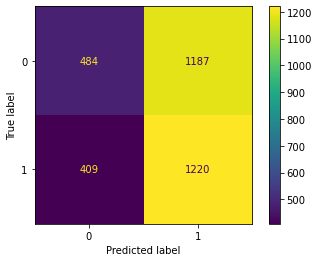

In [133]:
plot_confusion_matrix(gnb, X_test_svd, y_test);

In [ ]:
# regular expression underscore, tfidf vectorizer, hashing vectorizer

In [ ]:
# baseline model - naive bayes no hyperparameters

In [ ]:
# decision tree, random forest, neural networks

In [ ]:
# how do i further reduce the dimensions of the data, pca

In [ ]:
# hyperparameter tuning

In [ ]:
# train test split, cross validation, whenever train score = = test score, i run model on test data.

In [ ]:
# tune hyperparameters of random forest

In [ ]:
# grid search to find the right parameters

In [ ]:
# scrape from Reddit to import neutral comments

In [ ]:
# today:  vizualize duplicate rows, do first vectorization using hashingvectorizer, and run baseline model using
# naive bayes